# Plotting cross Isobath transports

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import cmocean as cm

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

#figdir = '/g/data/v45/akm157/figures/Antarctic_cross_slope/depth_int_heat_trans/'

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 48,Total memory: 188.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33261,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 48
Started: Just now,Total memory: 188.56 GiB
Comm: tcp://127.0.0.1:42265,Total threads: 6
Dashboard: /proxy/34071/status,Memory: 23.57 GiB
Nanny: tcp://127.0.0.1:40967,


### Open data:

In [10]:
names = ['Neutral', 'PC1Plus', 'PC1Minus', 'PC2Plus', 'PC2Minus']
import cosima_cookbook as cc 
expt = '01deg_jra55v140_iaf_cycle3'
session = cc.database.create_session()
hu = cc.querying.getvar(expt, 'hu', session, n=1) 
hu = hu.sel(yu_ocean = slice(-90,-50))
ht = cc.querying.getvar(expt, 'hu', session, n=1) 
ht = hu.sel(yu_ocean = slice(-90,-50)).load()
area = cc.querying.getvar(expt, variable='area_u', 
                          session= session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1)
area = area.sel(yu_ocean = slice(-90,-50))
expts = ['01deg_jra55_9091ryf', '01deg_jra55_ryf_ZW3PC1Plus','01deg_jra55_ryf_ZW3PC1Minus','01deg_jra55_ryf_ZW3PC2Plus','01deg_jra55_ryf_ZW3PC2Minus']


In [5]:
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=25) 
rc('ytick', labelsize=25) 
rc('axes', labelsize=25) 

In [6]:
def lim_regional(region,ax, ht):
    land = xr.where(np.isnan(ht.rename('land')), 1, np.nan)
    land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
    if region == "Ross":
        ax.set_xlim(-200,-130)
        ax.set_ylim(-80,-70)
    if region == "Weddell":
        ax.set_xlim(-80,40)
        ax.set_ylim(-80,-60)
    if region == "Amundsen":
        ax.set_xlim(-140,-70)
        ax.set_ylim(-76,-65)
    if region == "Prydz":
        ax.set_xlim(60,80)
        ax.set_ylim(-70,-63)

In [19]:
def load_transp_mean(expt,n_months):
    # Open pre-processed cross slope transport data:
    # Note this is slow.
    
    path = np.sort(glob.glob('/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/'+expt+'/*.nc'))
    # print(path)
    vol_transp = xr.open_dataset('/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/'+expt+'/vol_trans_across_contour_2180_01.nc')
    
    for i in range(1, n_months):
        try:
            vol_transp = xr.concat([vol_transp, xr.open_dataset(path[i])], dim = 'time')
        except:
            vol_transp = xr.concat([vol_transp, xr.ones_like(vol_transp.isel(time = 0))*np.nan], dim = 'time')
            print(expt, i)
    # vol_transp['time'] = time_tot.values
    return(vol_transp)

In [20]:
n_month = 48
vol_transp = [load_transp_mean(expts[x],n_month).vol_trans_across_contour_binned for x in range(len(names))]
vol_transp_mean = [transp.mean('time') for transp in vol_transp]

01deg_jra55_ryf_ZW3PC1Plus 36
01deg_jra55_ryf_ZW3PC1Plus 37
01deg_jra55_ryf_ZW3PC1Plus 38
01deg_jra55_ryf_ZW3PC1Plus 39
01deg_jra55_ryf_ZW3PC1Plus 40
01deg_jra55_ryf_ZW3PC1Plus 41
01deg_jra55_ryf_ZW3PC1Plus 42
01deg_jra55_ryf_ZW3PC1Plus 43
01deg_jra55_ryf_ZW3PC1Plus 44
01deg_jra55_ryf_ZW3PC1Plus 45
01deg_jra55_ryf_ZW3PC1Plus 46
01deg_jra55_ryf_ZW3PC1Plus 47
01deg_jra55_ryf_ZW3PC1Minus 36
01deg_jra55_ryf_ZW3PC1Minus 37
01deg_jra55_ryf_ZW3PC1Minus 38
01deg_jra55_ryf_ZW3PC1Minus 39
01deg_jra55_ryf_ZW3PC1Minus 40
01deg_jra55_ryf_ZW3PC1Minus 41
01deg_jra55_ryf_ZW3PC1Minus 42
01deg_jra55_ryf_ZW3PC1Minus 43
01deg_jra55_ryf_ZW3PC1Minus 44
01deg_jra55_ryf_ZW3PC1Minus 45
01deg_jra55_ryf_ZW3PC1Minus 46
01deg_jra55_ryf_ZW3PC1Minus 47


In [62]:
da_salt_terranova = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/Terra_Nova_salinity.nc")
da_salt_terranova_benchmark = xr.open_dataset("/g/data/oz91/ma3822/ZW3/data/fig34/Terra_Nova_salinity_benchmark.nc")    
southernmost_saltanom_PC1plus = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/southernmost_salt_PC1plus_depthweight.nc")
southernmost_saltanom_PC2plus = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/southernmost_salt_PC2plus_depthweight.nc")
da_agebottom = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/agebottom_0_24.nc")
ds_iaf = xr.open_dataset("/g/data/oz91/ma3822/ZW3/data/fig34/ds_iaf.nc")


In [22]:
def load_transp_mean_bench(expt):
    # Open pre-processed cross slope transport data:
    # Note this is slow.
    
    path = np.sort(glob.glob('/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/'+expt+'/*.nc'))
    print(path)
    vol_transp = xr.open_dataset('/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/'+expt+'/vol_trans_across_contour_2170_01.nc')
    
    for i in range(1, len(path)):
        try:
            vol_transp = xr.concat([vol_transp, xr.open_dataset(path[i])], dim = 'time')
        except:
            vol_transp = xr.concat([vol_transp, xr.ones_like(vol_transp.isel(time = 0))*np.nan], dim = 'time')
            print(expt, i)
    # vol_transp['time'] = time_tot.values
    return(vol_transp)

In [23]:
vol_transp_bench = load_transp_mean_bench("01deg_jra55v13_ryf9091").vol_trans_across_contour_binned
import datetime
vol_transp_bench["time"] = np.array([datetime.datetime(1970 + i//12,1+i%12,1) for i in range(len(vol_transp_bench.time))])

['/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_01.nc'
 '/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_02.nc'
 '/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_03.nc'
 '/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_04.nc'
 '/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_05.nc'
 '/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_06.nc'
 '/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_07.nc'
 '/g/data/oz91/ma3822/ZW3/data/fig34/cross_contour_transport/01deg_jra55v13_ryf9091/vol_trans_across_contour_2170_08.nc'
 '/g/data/oz91/ma3822/ZW3/data/f

In [24]:
def lat_lon_contour(session,expt):

    # Compute lat/long along contour:
    
    isobath_depth = 1000
    outfile = '/g/data/oz91/ma3822/ZW3/data/fig34/Antarctic_contour_1000m.npz'
    data = np.load(outfile)
    mask_y_transport_numbered = data['mask_y_transport_numbered']
    mask_x_transport_numbered = data['mask_x_transport_numbered']
    
    yt_ocean = cc.querying.getvar(expt,'yt_ocean',session,n=1)
    yt_ocean = yt_ocean.sel(yt_ocean=slice(-90,-59))
    yu_ocean = cc.querying.getvar(expt,'yu_ocean',session,n=1)
    yu_ocean = yu_ocean.sel(yu_ocean=slice(-90,-59))
    xt_ocean = cc.querying.getvar(expt,'xt_ocean',session,n=1)
    xu_ocean = cc.querying.getvar(expt,'xu_ocean',session,n=1)
    
    mask_x_transport_numbered = xr.DataArray(mask_x_transport_numbered, coords=[('y_ocean', yt_ocean.data), ('x_ocean', 
    xu_ocean.data)])
    mask_y_transport_numbered = xr.DataArray(mask_y_transport_numbered, coords=[('y_ocean', yu_ocean.data), ('x_ocean', 
    xt_ocean.data)])
    
    # stack contour data into 1d:
    mask_x_numbered_1d = mask_x_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
    mask_x_numbered_1d = mask_x_numbered_1d.where(mask_x_numbered_1d > 0, drop = True)
    mask_y_numbered_1d = mask_y_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
    mask_y_numbered_1d = mask_y_numbered_1d.where(mask_y_numbered_1d > 0, drop = True)
    contour_ordering = xr.concat((mask_x_numbered_1d,mask_y_numbered_1d), dim = 'contour_index')
    contour_ordering = contour_ordering.sortby(contour_ordering)
    contour_index_array = np.arange(1,len(contour_ordering)+1)
    
    lat_along_contour = contour_ordering.y_ocean
    lon_along_contour = contour_ordering.x_ocean
    # don't need the multi-index anymore, replace with contour count
    lat_along_contour.coords['contour_index'] = contour_index_array
    lon_along_contour.coords['contour_index'] = contour_index_array
    return(lon_along_contour,lat_along_contour)

In [25]:
lon_along_contour,lat_along_contour = lat_lon_contour(session,expt) 

In [26]:
vol_transp_bench_ross = vol_transp_bench.where((lon_along_contour>-200)&(lon_along_contour<-160),drop=True).sel(isopycnal_bins = slice(32.56,None)).sum("isopycnal_bins").sum('contour_index')/1e6


In [27]:
vol_transp_bench_ross_mean = vol_transp_bench_ross.groupby('time.month').mean().to_numpy()
vol_transp_bench_ross_std = vol_transp_bench_ross.groupby('time.month').std().to_numpy()
vol_transp_bench_ross_mean_36 = np.array(vol_transp_bench_ross_mean.tolist()*3)
vol_transp_bench_ross_std_36 = np.array(vol_transp_bench_ross_std.tolist()*3)

(0.0, 35.0)

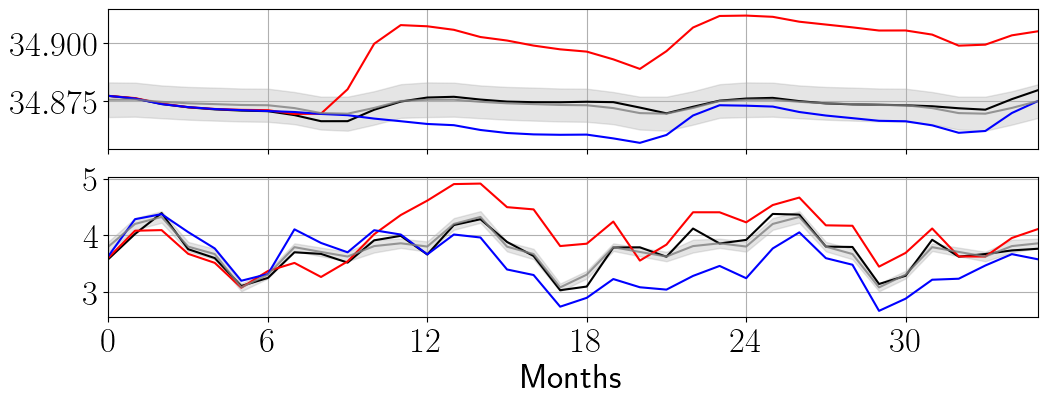

In [33]:
#Ross
import datetime
hov_time_datetime = range(0,36)


colors = ["k", "r", "b"]
alpha = [1,1,1]
endmonth = [36,36,36,48,48]
reg = (lon_along_contour>-200)&(lon_along_contour<-160)
f, axes = plt.subplots(2,1,figsize = (12,4), sharex = True)
ax = axes[0]
for a,i in enumerate([0,1,2]):
    ax.plot(hov_time_datetime,da_salt_terranova[a][:endmonth[a]], color = colors[a], alpha = alpha[a])
ax.grid()
ax.plot(hov_time_datetime,da_salt_terranova_benchmark.tn_salt_mean, color = "grey", alpha = 0.8)
ax.fill_between(hov_time_datetime,da_salt_terranova_benchmark.tn_salt_mean - da_salt_terranova_benchmark.tn_salt_std,da_salt_terranova_benchmark.tn_salt_mean + da_salt_terranova_benchmark.tn_salt_std , color = "grey", alpha = 0.2)


ax = axes[1]
region = "Ross"
reg_trans = [vol_transp_var.where((lon_along_contour>-200)&(lon_along_contour<-160),drop=True) for vol_transp_var in vol_transp]
for a,i in enumerate([0,1,2]):
    reg_trans_y = reg_trans[i].sel(isopycnal_bins = slice(32.56,None)).sum("isopycnal_bins").sum('contour_index')/1e6
    ax.plot(hov_time_datetime,reg_trans_y[:endmonth[a]], color = colors[a], alpha = alpha[a])
    
ax.plot(hov_time_datetime,vol_transp_bench_ross_mean_36, color = "grey", alpha = 0.8)
ax.fill_between(hov_time_datetime,vol_transp_bench_ross_mean_36 - vol_transp_bench_ross_std_36,vol_transp_bench_ross_mean_36 + vol_transp_bench_ross_std_36 , color = "grey", alpha = 0.2)
# ax.plot(hov_time_datetime,vol_transp_bench_ross[:len(hov_time_datetime)], color = "grey", alpha = 0.8)


ax.set_xlabel("Months")
ax.grid()
ax.set_xticks(range(0,42,6))
ax.set_xlim(0,35)

# plt.ylabel("cross 1000m DSW transport")


In [34]:
# da_swmt_shelf = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/swmt_yr12_32_85.nc")


In [37]:
def shelf_mask_isobath(var):
    '''
    Masks ACCESS-OM2-01 variables by the region polewards of the 1000m isobath as computed using 
    a script contributed by Adele Morrison.
    Only to be used with ACCESS-OM2-0.1 output!
    '''
    # contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')
    contour_file = np.load('/g/data/oz91/ma3822/ZW3/data/fig34/Antarctic_slope_contour_1000m_swmt.npz')

    shelf_mask = contour_file['contour_masked_above']
    yt_ocean = contour_file['yt_ocean']
    xt_ocean = contour_file['xt_ocean']
    
    # in this file the points along the isobath are given a positive value, the points outside (northwards) 
    # of the isobath are given a value of -100 and all the points on the continental shelf have a value of 0 
    # so we mask for the 0 values 
    shelf_mask[np.where(shelf_mask!=0)] = np.nan
    shelf_mask = shelf_mask+1
    shelf_map  = np.nan_to_num(shelf_mask)
    shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    shelf_map  = xr.DataArray(shelf_map,  coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    
    # then we want to multiply the variable with the mask so we need to account for the shape of the mask. 
    # The mask uses a northern cutoff of 59S.
    masked_var = var.sel(yt_ocean = slice(-90, -59.03)) * shelf_mask

    return masked_var, shelf_map

In [38]:
ht = cc.querying.getvar(expt, 'ht', session, n=1) 
ht = ht.sel(yt_ocean = slice(-90, -59))

land_mask = (ht*0).fillna(1)
yt_ocean = ht.yt_ocean.values
xt_ocean = ht.xt_ocean.values
ht_shelf, shelf_mask = shelf_mask_isobath(ht)

In [39]:
area_t = cc.querying.getvar(expt, 'area_t', session, n=1)

In [40]:
area_t_shelf, shelf_mask = shelf_mask_isobath(area_t)

In [42]:
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 
rc('axes', labelsize=14) 

In [45]:
maxage = float(da_agebottom.sel(scenario = "Neutral").max())

# Combine and plot for PC1 on Ross

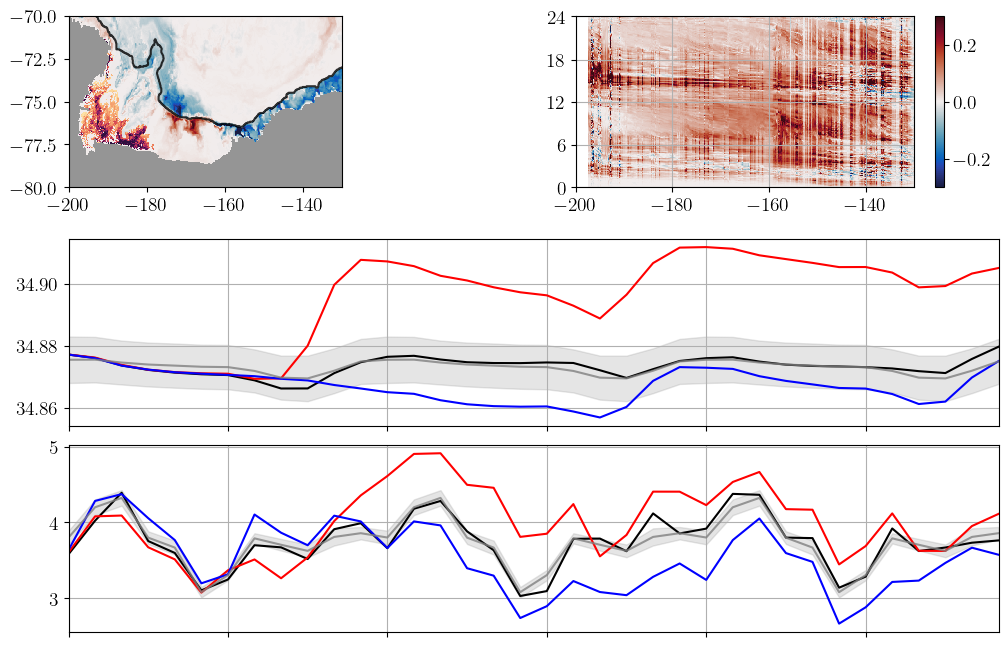

In [49]:
da_swmt_shelf = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/swmt_sig0_yr12.nc").sel(isopycnal_bins = slice(27.95,28.051)).mean('isopycnal_bins')
import matplotlib.gridspec as gridspec


f = plt.figure(figsize = (12,8))
gs = gridspec.GridSpec(3, 2, 
                       height_ratios=[1, 1, 1],
                       hspace=0.3)
gs2 = gridspec.GridSpec(3, 3, 
                       height_ratios=[1, 1, 1],
                       hspace=0.3)
ax1 = plt.subplot(gs2[0, 0])
ax2 = plt.subplot(gs[0, 1])
gs_bottom = gridspec.GridSpecFromSubplotSpec(2, 1, gs[1:, :], 
                                            hspace=0.1)
ax4 = plt.subplot(gs_bottom[1])
ax3 = plt.subplot(gs_bottom[0], sharex=ax4)


ax = ax1
ax.contour(shelf_mask.xt_ocean, shelf_mask.yt_ocean, shelf_mask, [0, 1],
           colors='k', alpha =0.8)
cs = ax.pcolormesh(da_agebottom.xt_ocean, da_agebottom.yt_ocean, da_agebottom.sel(scenario = "PC1Plus")/maxage - da_agebottom.sel(scenario = "Neutral")/maxage,
                       cmap=cm.cm.balance, vmin=-0.1, vmax=0.1)
swmt_loc = da_swmt_shelf
swmt_loc = swmt_loc.where(swmt_loc>0)
plot_swmt = ax.pcolormesh(da_swmt_shelf.xt_ocean, da_swmt_shelf.yt_ocean, swmt_loc.sel(scenario = "PC1Plus"),
                           cmap=cm.cm.matter, vmin = 0, vmax = 2.5*1e-5)
land = xr.where(np.isnan(ht.rename('land')), 1, np.nan)
land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
lim_regional("Ross", ax,ht)
ax.set_xlabel(None)
ax.set_ylabel(None)


ax = ax2
hov = southernmost_saltanom_PC1plus.sel(time = slice("2180-01-01", "2182-01-01"))
hov_time_datetime = [datetime.datetime(1,1,2) + datetime.timedelta(days = i) for i in range(len(hov.time))]
cs = ax.pcolormesh(hov.xt_ocean_sub01,hov_time_datetime, hov, cmap = cm.cm.balance, vmin = -0.3,vmax = 0.3)
# ax.colorbar()
ax.set_yticks([datetime.datetime(1+i//12,1+i%12,1) for i in range(0,30,6)], labels =[r'${}$'.format(i) for i in range(0,30,6)] )
ax.grid()
cbar2 = plt.colorbar(cs, ax = ax2)
# cbar2.set_label(r'Salinity Anomaly (psu)', rotation=270, labelpad=20, size = 12)




ax = ax3
colors = ["k", "r", "b"]
alpha = [1,1,1]
endmonth = [36,36,36,48,48]
reg = (lon_along_contour>-200)&(lon_along_contour<-160)
for a,i in enumerate([0,1,2]):
    ax.plot(range(0,36),da_salt_terranova[a][:endmonth[a]], color = colors[a], alpha = alpha[a])
ax.grid()
ax.plot(range(0,36),da_salt_terranova_benchmark.tn_salt_mean, color = "grey", alpha = 0.8)
ax.fill_between(range(0,36),da_salt_terranova_benchmark.tn_salt_mean - da_salt_terranova_benchmark.tn_salt_std,da_salt_terranova_benchmark.tn_salt_mean + da_salt_terranova_benchmark.tn_salt_std , color = "grey", alpha = 0.2)
ax.set_xticks(range(0,42,6))
ax.set_xlim(0,35)
ax3.set_xticklabels([])

ax = ax4
region = "Ross"
reg_trans = [vol_transp_var.where((lon_along_contour>-200)&(lon_along_contour<-160),drop=True) for vol_transp_var in vol_transp]
for a,i in enumerate([0,1,2]):
    reg_trans_y = reg_trans[i].sel(isopycnal_bins = slice(32.56,None)).sum("isopycnal_bins").sum('contour_index')/1e6
    ax.plot(hov_time_datetime2,reg_trans_y[:endmonth[a]], color = colors[a], alpha = alpha[a])
ax.plot(hov_time_datetime2,vol_transp_bench_ross_mean_36, color = "grey", alpha = 0.8)
ax.fill_between(hov_time_datetime2,vol_transp_bench_ross_mean_36 - vol_transp_bench_ross_std_36,vol_transp_bench_ross_mean_36 + vol_transp_bench_ross_std_36 , color = "grey", alpha = 0.2)
# ax.set_ylabel("Transport (Sv)")
# ax.set_xlabel("Months")
ax.grid()
ax.set_xticks(range(0,42,6))
ax.set_xlim(0,35)
ax4.tick_params(labelbottom=True)

plt.tight_layout()


# Same with PC2

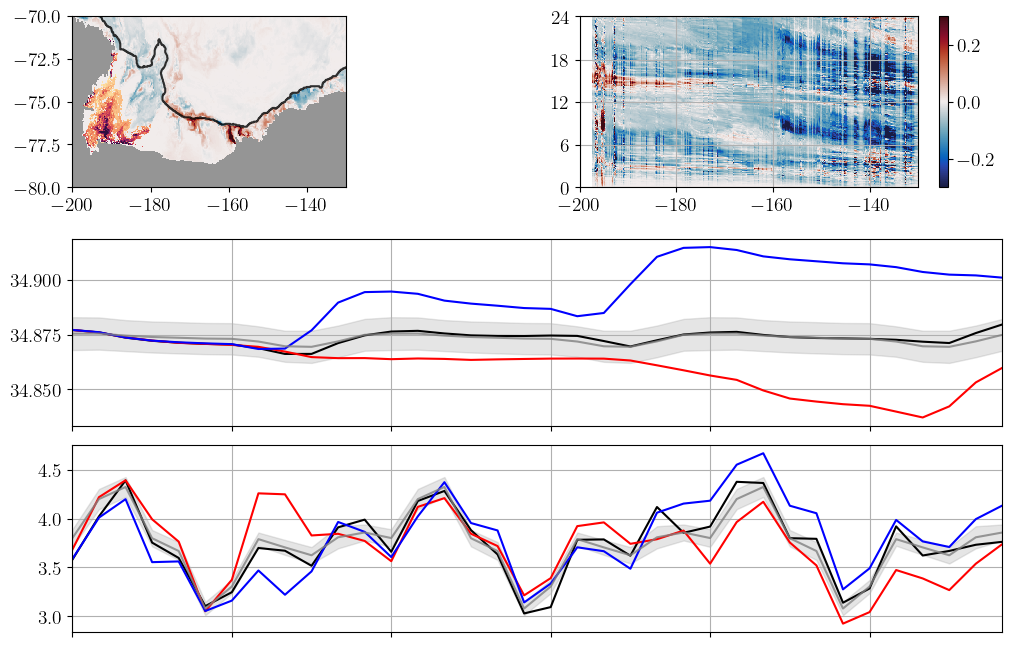

In [56]:
da_swmt_shelf = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/swmt_sig0_yr12.nc").sel(isopycnal_bins = slice(27.95,28.051)).mean('isopycnal_bins')

f = plt.figure(figsize = (12,8))
gs = gridspec.GridSpec(3, 2, 
                       height_ratios=[1, 1, 1],
                       hspace=0.3)
gs2 = gridspec.GridSpec(3, 3, 
                       height_ratios=[1, 1, 1],
                       hspace=0.3)
ax1 = plt.subplot(gs2[0, 0])
ax2 = plt.subplot(gs[0, 1])
gs_bottom = gridspec.GridSpecFromSubplotSpec(2, 1, gs[1:, :], hspace=0.1) 

ax4 = plt.subplot(gs_bottom[1])
ax3 = plt.subplot(gs_bottom[0], sharex=ax4)


ax = ax1
ax.contour(shelf_mask.xt_ocean, shelf_mask.yt_ocean, shelf_mask, [0, 1],
           colors='k', alpha =0.8)
cs = ax.pcolormesh(da_agebottom.xt_ocean, da_agebottom.yt_ocean, da_agebottom.sel(scenario = "PC2Plus")/maxage - da_agebottom.sel(scenario = "Neutral")/maxage,
                       cmap=cm.cm.balance, vmin=-0.1, vmax=0.1)
swmt_loc = da_swmt_shelf
swmt_loc = swmt_loc.where(swmt_loc>0)
plot_swmt = ax.pcolormesh(da_swmt_shelf.xt_ocean, da_swmt_shelf.yt_ocean, swmt_loc.sel(scenario = "PC2Plus"),
                           cmap=cm.cm.matter, vmin = 0, vmax = 2.5*1e-5)
land = xr.where(np.isnan(ht.rename('land')), 1, np.nan)
land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
lim_regional("Ross", ax,ht)
ax.set_xlabel(None)
ax.set_ylabel(None)

ax = ax2
hov = southernmost_saltanom_PC2plus.sel(time = slice("2180-01-01", "2182-01-01"))
hov_time_datetime = [datetime.datetime(1,1,2) + datetime.timedelta(days = i) for i in range(len(hov.time))]
cs = ax.pcolormesh(hov.xt_ocean_sub01,hov_time_datetime, hov, cmap = cm.cm.balance, vmin = -0.3,vmax = 0.3)
# ax.colorbar()
ax.set_yticks([datetime.datetime(1+i//12,1+i%12,1) for i in range(0,30,6)], labels =[r'${}$'.format(i) for i in range(0,30,6)] )
ax.grid()
cbar2 = plt.colorbar(cs, ax = ax2)

ax = ax3
import datetime
hov_time_datetime2 = range(0,36)
colors = ["k", "r", "b"]
alpha = [1,1,1]
endmonth = [36,36,36,36,36]
reg = (lon_along_contour>-200)&(lon_along_contour<-160)
for a,i in enumerate([0,3,4]):
    ax.plot(range(0,36),da_salt_terranova[i][:endmonth[a]], color = colors[a], alpha = alpha[a])
ax.grid()
ax.plot(range(0,36),da_salt_terranova_benchmark.tn_salt_mean, color = "grey", alpha = 0.8)
ax.fill_between(range(0,36),da_salt_terranova_benchmark.tn_salt_mean - da_salt_terranova_benchmark.tn_salt_std,da_salt_terranova_benchmark.tn_salt_mean + da_salt_terranova_benchmark.tn_salt_std , color = "grey", alpha = 0.2)
ax.set_xticks(range(0,42,6))
ax.set_xlim(0,35)
ax3.set_xticklabels([])



ax = ax4
region = "Ross"
reg_trans = [vol_transp_var.where((lon_along_contour>-200)&(lon_along_contour<-160),drop=True) for vol_transp_var in vol_transp]
for a,i in enumerate([0,3,4]):
    reg_trans_y = reg_trans[i].sel(isopycnal_bins = slice(32.56,None)).sum("isopycnal_bins").sum('contour_index')/1e6
    ax.plot(hov_time_datetime2,reg_trans_y[:endmonth[a]], color = colors[a], alpha = alpha[a])
ax.plot(hov_time_datetime2,vol_transp_bench_ross_mean_36, color = "grey", alpha = 0.8)
ax.fill_between(hov_time_datetime2,vol_transp_bench_ross_mean_36 - vol_transp_bench_ross_std_36,vol_transp_bench_ross_mean_36 + vol_transp_bench_ross_std_36 , color = "grey", alpha = 0.2)
ax.grid()
ax.set_xticks(range(0,42,6))
ax.set_xlim(0,35)
ax4.tick_params(labelbottom=True)

plt.tight_layout()


# Now in Weddell

In [57]:
vol_transp_bench_weddell = vol_transp_bench.where((lon_along_contour>-60)&(lon_along_contour<-0),drop=True).sel(isopycnal_bins = slice(32.56,None)).sum("isopycnal_bins").sum('contour_index')/1e6
vol_transp_bench_weddell_mean = vol_transp_bench_weddell.groupby('time.month').mean().to_numpy()
vol_transp_bench_weddell_std = vol_transp_bench_weddell.groupby('time.month').std().to_numpy()
vol_transp_bench_weddell_mean_48 = np.array(vol_transp_bench_weddell_mean.tolist()*4)
vol_transp_bench_weddell_std_48 = np.array(vol_transp_bench_weddell_std.tolist()*4)

Text(0, 0.5, '')

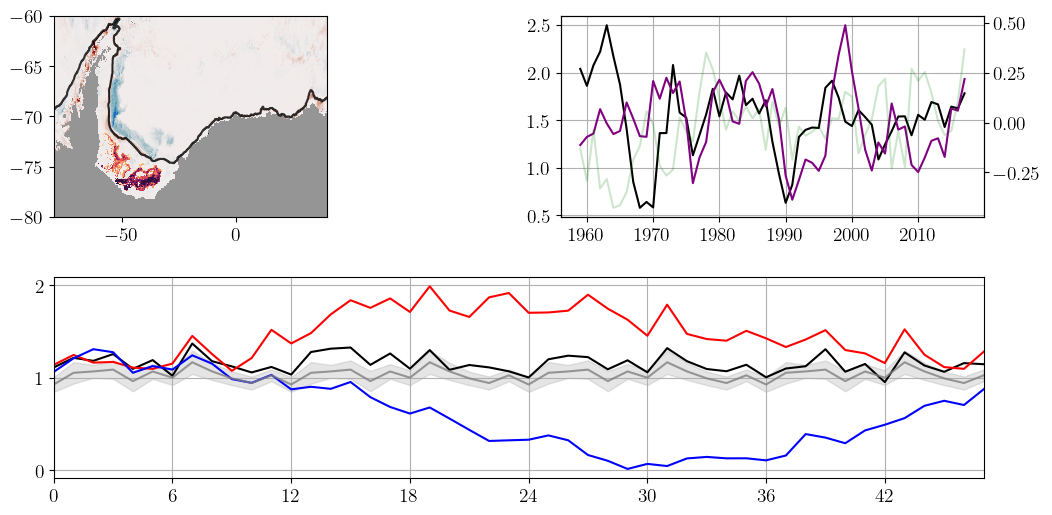

In [59]:
da_swmt_shelf = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/swmt_sig0_yr12.nc").sel(isopycnal_bins = slice(27.809,27.831)).mean('isopycnal_bins')

f = plt.figure(figsize = (12,6))
gs = gridspec.GridSpec(2, 2, 
                       height_ratios=[1, 1], 
                       hspace=0.3) 
gs2 = gridspec.GridSpec(2, 3, 
                       height_ratios=[1, 1], 
                       hspace=0.3) 
ax1 = plt.subplot(gs2[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1,:])


ax = ax1
ax.contour(shelf_mask.xt_ocean, shelf_mask.yt_ocean, shelf_mask, [0, 1],
           colors='k', alpha =0.8)
cs = ax.pcolormesh(da_agebottom.xt_ocean, da_agebottom.yt_ocean, da_agebottom.sel(scenario = "PC2Plus")/maxage - da_agebottom.sel(scenario = "Neutral")/maxage,
                       cmap=cm.cm.balance, vmin=-0.1, vmax=0.1)
swmt_loc = da_swmt_shelf
swmt_loc = swmt_loc.where(swmt_loc>0)
plot_swmt = ax.pcolormesh(da_swmt_shelf.xt_ocean, da_swmt_shelf.yt_ocean, swmt_loc.sel(scenario = "PC2Plus"),
                           cmap=cm.cm.matter, vmin = 0, vmax = 2.5*1e-5)
land = xr.where(np.isnan(ht.rename('land')), 1, np.nan)
land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
lim_regional("Weddell", ax,ht)
ax.set_xlabel(None)
ax.set_ylabel(None)

ax = ax2
year_s = 25
ds_iaf.Weddell_SWMT_runningmean.plot(ax = ax2,color = 'k')
ax.set_ylabel('Weddell_SWMT');
axdup = ax.twinx()
ds_iaf.PC2_runningmean.plot(ax = axdup, color = "purple")
ds_iaf.PC1_runningmean.plot(ax = axdup, color = "green", alpha = 0.2)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.grid()

ax = ax3
hov_time_datetime = range(0,48)
colors = ["k", "r", "b"]
alpha = [1,1,1]
endmonth = [48,36,36,48,48]
reg = (lon_along_contour>-200)&(lon_along_contour<-160)
region = "Weddell"
reg_trans = [vol_transp_var.where((lon_along_contour>-60)&(lon_along_contour<0),drop=True) for vol_transp_var in vol_transp]
for a,i in enumerate([0,3,4]):
    reg_trans_y = reg_trans[i].sel(isopycnal_bins = slice(32.56,None)).sum("isopycnal_bins").sum('contour_index')/1e6
    ax.plot(hov_time_datetime,reg_trans_y[:endmonth[i]], color = colors[a], alpha = alpha[a])
ax.plot(hov_time_datetime,vol_transp_bench_weddell_mean_48, color = "grey", alpha = 0.8)
ax.fill_between(hov_time_datetime,vol_transp_bench_weddell_mean_48 - vol_transp_bench_weddell_std_48,vol_transp_bench_weddell_mean_48 + vol_transp_bench_weddell_std_48 , color = "grey", alpha = 0.2)
ax.grid()
ax.set_xticks(range(0,54,6))
ax.set_yticks(range(0,3,1))
ax.set_xlim(0,47)
plt.tight_layout()
axdup.set_ylabel(None)

# Opposed case for SI

Text(0, 0.5, '')

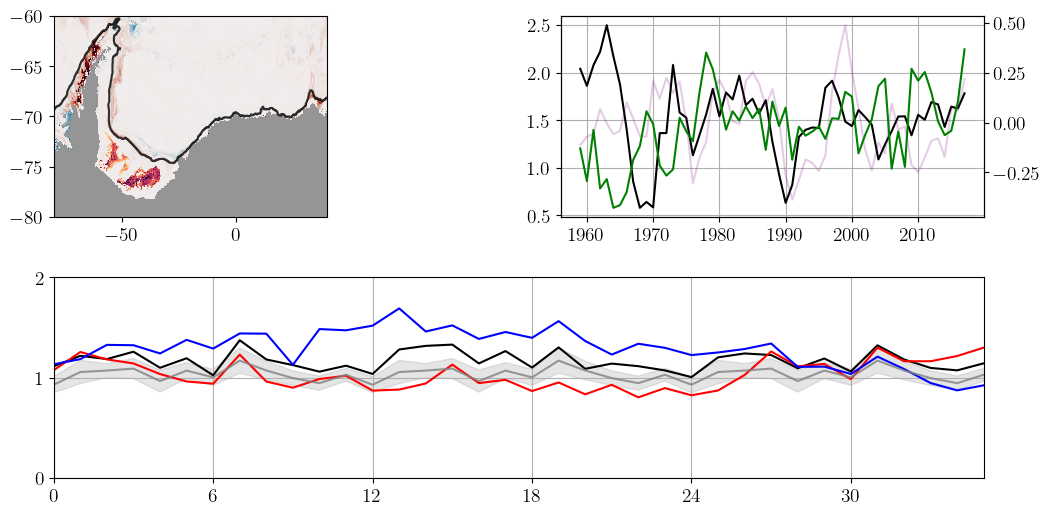

In [61]:
da_swmt_shelf = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/fig34/swmt_sig0_yr12.nc").sel(isopycnal_bins = slice(27.809,27.831)).mean('isopycnal_bins')

f = plt.figure(figsize = (12,6))
gs = gridspec.GridSpec(2, 2, 
                       height_ratios=[1, 1],  # Equal heights for all rows
                       hspace=0.3)  # Overall vertical spacing
gs2 = gridspec.GridSpec(2, 3, 
                       height_ratios=[1, 1],  # Equal heights for all rows
                       hspace=0.3)  # Overall vertical spacingc
ax1 = plt.subplot(gs2[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1,:])


ax = ax1
ax.contour(shelf_mask.xt_ocean, shelf_mask.yt_ocean, shelf_mask, [0, 1],
           colors='k', alpha =0.8)
cs = ax.pcolormesh(da_agebottom.xt_ocean, da_agebottom.yt_ocean, da_agebottom.sel(scenario = "PC1Plus")/maxage - da_agebottom.sel(scenario = "Neutral")/maxage,
                       cmap=cm.cm.balance, vmin=-0.1, vmax=0.1)
swmt_loc = da_swmt_shelf
swmt_loc = swmt_loc.where(swmt_loc>0)
plot_swmt = ax.pcolormesh(da_swmt_shelf.xt_ocean, da_swmt_shelf.yt_ocean, swmt_loc.sel(scenario = "PC1Plus"),
                           cmap=cm.cm.matter, vmin = 0, vmax = 2.5*1e-5)
land = xr.where(np.isnan(ht.rename('land')), 1, np.nan)
land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
lim_regional("Weddell", ax,ht)
ax.set_xlabel(None)
ax.set_ylabel(None)

ax = ax2
year_s = 25
ds_iaf.Weddell_SWMT_runningmean.plot(ax = ax2,color = 'k')
ax.set_ylabel('Weddell_SWMT');
axdup = ax.twinx()
ds_iaf.PC2_runningmean.plot(ax = axdup, color = "purple", alpha = 0.2)
ds_iaf.PC1_runningmean.plot(ax = axdup, color = "green")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.grid()

ax = ax3
colors = ["k", "r", "b"]
alpha = [1,1,1]
endmonth = [48,36,36,48,48]
hov_time_datetime = [range(0,e) for e in endmonth]
reg = (lon_along_contour>-200)&(lon_along_contour<-160)
region = "Weddell"
reg_trans = [vol_transp_var.where((lon_along_contour>-60)&(lon_along_contour<0),drop=True) for vol_transp_var in vol_transp]
for a,i in enumerate([0,1,2]):
    reg_trans_y = reg_trans[i].sel(isopycnal_bins = slice(32.56,None)).sum("isopycnal_bins").sum('contour_index')/1e6
    ax.plot(hov_time_datetime[i],reg_trans_y[:endmonth[i]], color = colors[a], alpha = alpha[a])
ax.plot(hov_time_datetime[0],vol_transp_bench_weddell_mean_48, color = "grey", alpha = 0.8)
ax.fill_between(hov_time_datetime[0],vol_transp_bench_weddell_mean_48 - vol_transp_bench_weddell_std_48,vol_transp_bench_weddell_mean_48 + vol_transp_bench_weddell_std_48 , color = "grey", alpha = 0.2)
ax.grid()
ax.set_xticks(range(0,54,6))
ax.set_yticks(range(0,3,1))
ax.set_xlim(0,35)


plt.tight_layout()
# plt.subplots_adjust(hspace=0.15)  # Reduce vertical spacing between subplots
axdup.set_ylabel(None)
